In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
import nltk
from nltk.corpus import stopwords
import string

In [4]:
#load dataset
data=pd.read_csv("C:\\Users\\HP\\Desktop\\Projects\\EMailSpam\\spam.csv")
data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
## no of rows and columns
data.shape

(5572, 2)

In [6]:
### column names
data.columns

Index(['Label', 'EmailText'], dtype='object')

In [7]:
### checking duplicates and removing items
data.drop_duplicates(inplace=True)
data.shape

(5169, 2)

In [8]:
### show no. of missing data for each column
data.isnull().sum()

Label        0
EmailText    0
dtype: int64

Percentage for default

ham     87.37
spam    12.63
Name: Label, dtype: float64


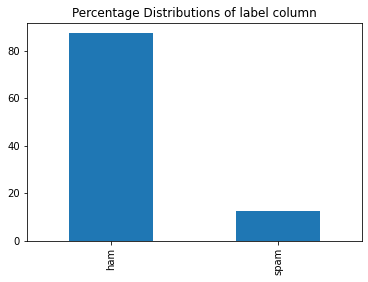

In [9]:
### checking for the distribution of label[] column
import matplotlib.pyplot as plt
%matplotlib inline
print("Percentage for default\n")
print(round(data.Label.value_counts(normalize=True)*100,2))
round(data.Label.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions of label column')
plt.show()

In [10]:
### download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
### Tokenization

def process_text(text):
    
    ##  remove punctuation
      nopunc = [char for char in text if char not in string.punctuation]
      nopunc = ''.join(nopunc)
    
    ## remove stopwords
      clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
        
    ## return list of clean words
      return clean_words

In [12]:
data['EmailText'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: EmailText, dtype: object

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

msg = CountVectorizer(analyzer=process_text).fit_transform(data['EmailText'])

In [14]:
## split data into 80% training and 20% testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(msg, data['Label'], test_size = 0.20, random_state = 0)

In [15]:
### shape of msg
msg.shape

(5169, 11304)

# models used as classifier

In [16]:
model_names=['SVM','Naive_bayes','Logistic_regression','k-nearest_neighbor','Decision_tree']
model_train_scores=[]
model_test_scores=[]
train_precision_score=[]
test_precision_score=[]
train_recall_score=[]
test_recall_score=[]

# modelling using Support vector machine algo

In [17]:
### support vector machine
from sklearn import svm
model = svm.SVC()
model.fit(X_train,Y_train)

SVC()

In [18]:
##print predictions on train dataset
svm_pred = model.predict(X_train)
print('Predicted values : ',svm_pred)
##print actual values on train dataset
print('Actual Values : ',Y_train.values)

Predicted values :  ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Actual Values :  ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [19]:
### evaluate model on training datasets using SVM classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(classification_report(Y_train,svm_pred))

train_svm_mat=confusion_matrix(Y_train,svm_pred)
print("confusion matrix :\n",train_svm_mat)

model_train_scores.append(accuracy_score(Y_train,svm_pred))


              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      3631
        spam       1.00      0.95      0.98       504

    accuracy                           0.99      4135
   macro avg       1.00      0.98      0.99      4135
weighted avg       0.99      0.99      0.99      4135

confusion matrix :
 [[3631    0]
 [  24  480]]


In [20]:
### defining precision and recall
def precision(TP,FP):
    return(TP/(TP+FP))

def recall(TP,FN):
    return(TP/(TP+FN))

In [21]:
###  evaluating precision and recall on train dataset
train_precision_score.append(precision(train_svm_mat[0][0],train_svm_mat[0][1]))
train_recall_score.append(recall(train_svm_mat[0][0],train_svm_mat[1][0]))

In [22]:
### evaluate model on test dataset using svm algorithm
svm_pred_test = model.predict(X_test)
print(classification_report(Y_test,svm_pred_test))

test_svm_mat=confusion_matrix(Y_test, svm_pred_test)

print("confusion matrix :\n",test_svm_mat)
model_test_scores.append(accuracy_score(Y_test, svm_pred_test))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       885
        spam       1.00      0.72      0.84       149

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034

confusion matrix :
 [[885   0]
 [ 42 107]]


In [23]:
##print predictions on test dataset
svm_pred_test = model.predict(X_test)
print('Predicted values : ',svm_pred_test)
##print actual values on test dataset
print('Actual Values : ',Y_test.values)

Predicted values :  ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Actual Values :  ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [24]:
###  evaluating precision and recall on test dataset
test_precision_score.append(precision(test_svm_mat[0][0],test_svm_mat[0][1]))
test_recall_score.append(recall(test_svm_mat[0][0],test_svm_mat[1][0]))

# modelling using Naive bayes algo

In [25]:
### using naive bayes
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(X_train,Y_train)

MultinomialNB()

In [26]:
### evaluate model on training datasets using naive bayes ml algorithm
naive_pred = model2.predict(X_train)
print(classification_report(Y_train,naive_pred))

train_naive_mat = confusion_matrix(Y_train,naive_pred)
print('Confusion matrix :\n ',train_naive_mat)

model_train_scores.append(accuracy_score(Y_train, naive_pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3631
        spam       0.98      0.98      0.98       504

    accuracy                           1.00      4135
   macro avg       0.99      0.99      0.99      4135
weighted avg       1.00      1.00      1.00      4135

Confusion matrix :
  [[3623    8]
 [  11  493]]


In [27]:
###  evaluating precision and recall on train dataset
train_precision_score.append(precision(train_naive_mat[0][0],train_naive_mat[0][1]))
train_recall_score.append(recall(train_naive_mat[0][0],train_naive_mat[1][0]))

In [28]:
### evaluate model on test dataset using naive bayes ml algorithm
naive_pred_test = model2.predict(X_test)
print(classification_report(Y_test,naive_pred_test))

test_naive_mat = confusion_matrix(Y_test,naive_pred_test)
print('Confusion matrix :\n ',test_naive_mat)

model_test_scores.append(accuracy_score(Y_test,naive_pred_test))

              precision    recall  f1-score   support

         ham       0.99      0.96      0.97       885
        spam       0.80      0.93      0.86       149

    accuracy                           0.96      1034
   macro avg       0.89      0.94      0.92      1034
weighted avg       0.96      0.96      0.96      1034

Confusion matrix :
  [[850  35]
 [ 11 138]]


In [29]:
###  evaluating precision and recall on test dataset
test_precision_score.append(precision(test_naive_mat[0][0],test_naive_mat[0][1]))
test_recall_score.append(recall(test_naive_mat[0][0],test_naive_mat[1][0]))

# modelling using Logistic regression

In [30]:
### using logistic regression
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
model3.fit(X_train,Y_train)

LogisticRegression()

In [31]:
### evaluate model on training datasets using logistic regression ml algorithm
logistic_pred = model3.predict(X_train)
print(classification_report(Y_train,logistic_pred))

train_logistic_mat = confusion_matrix(Y_train,logistic_pred)
print('Confusion matrix :\n ',train_logistic_mat)

model_train_scores.append(accuracy_score(Y_train, logistic_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      3631
        spam       1.00      0.96      0.98       504

    accuracy                           1.00      4135
   macro avg       1.00      0.98      0.99      4135
weighted avg       1.00      1.00      1.00      4135

Confusion matrix :
  [[3631    0]
 [  20  484]]


In [32]:
###  evaluating precision and recall on train dataset
train_precision_score.append(precision(train_logistic_mat[0][0],train_logistic_mat[0][1]))
train_recall_score.append(recall(train_logistic_mat[0][0],train_logistic_mat[1][0]))

In [33]:
### evaluate model on test dataset using logistic regression algorithm
logistic_pred_test = model3.predict(X_test)
print(classification_report(Y_test,logistic_pred_test))

test_logistic_mat = confusion_matrix(Y_test,logistic_pred_test)
print('Confusion matrix :\n ',test_logistic_mat)

model_test_scores.append(accuracy_score(Y_test,logistic_pred_test))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       885
        spam       1.00      0.85      0.92       149

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Confusion matrix :
  [[885   0]
 [ 23 126]]


In [34]:
###  evaluating precision and recall on test dataset
test_precision_score.append(precision(test_logistic_mat[0][0],test_logistic_mat[0][1]))
test_recall_score.append(recall(test_logistic_mat[0][0],test_logistic_mat[1][0]))

# modelling using k-nearest neighbor classifier

In [35]:
### using k-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
### evaluate model on training datasets using k-nearest neighbor ml algorithm
knn_pred = model4.predict(X_train)
print(classification_report(Y_train,knn_pred))

train_knn_mat = confusion_matrix(Y_train,knn_pred)
print('Confusion matrix :\n ',train_knn_mat)

model_train_scores.append(accuracy_score(Y_train, knn_pred))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      3631
        spam       1.00      0.51      0.68       504

    accuracy                           0.94      4135
   macro avg       0.97      0.75      0.82      4135
weighted avg       0.94      0.94      0.93      4135

Confusion matrix :
  [[3631    0]
 [ 247  257]]


In [37]:
###  evaluating precision and recall on train dataset
train_precision_score.append(precision(train_knn_mat[0][0],train_knn_mat[0][1]))
train_recall_score.append(recall(train_knn_mat[0][0],train_knn_mat[1][0]))

In [38]:
### evaluate model on test dataset using k-nearest neighbor algorithm
knn_pred_test = model4.predict(X_test)
print(classification_report(Y_test,knn_pred_test))

test_knn_mat = confusion_matrix(Y_test,knn_pred_test)
print('Confusion matrix :\n ',test_knn_mat)

model_test_scores.append(accuracy_score(Y_test,knn_pred_test))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       885
        spam       1.00      0.33      0.49       149

    accuracy                           0.90      1034
   macro avg       0.95      0.66      0.72      1034
weighted avg       0.91      0.90      0.88      1034

Confusion matrix :
  [[885   0]
 [100  49]]


In [39]:
###  evaluating precision and recall on test dataset
test_precision_score.append(precision(test_knn_mat[0][0],test_knn_mat[0][1]))
test_recall_score.append(recall(test_knn_mat[0][0],test_knn_mat[1][0]))

# modelling using decision tree classifier

In [40]:
### using decision-tree classifier
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier()
model5.fit(X_train,Y_train)

DecisionTreeClassifier()

In [41]:
### evaluate model on training datasets using decision-tree classifier
tree_pred = model5.predict(X_train)
print(classification_report(Y_train,tree_pred))

train_tree_mat = confusion_matrix(Y_train,tree_pred)
print('Confusion matrix :\n ',train_tree_mat)

model_train_scores.append(accuracy_score(Y_train, tree_pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3631
        spam       1.00      1.00      1.00       504

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135

Confusion matrix :
  [[3631    0]
 [   0  504]]


In [42]:
###  evaluating precision and recall on train dataset
train_precision_score.append(precision(train_tree_mat[0][0],train_tree_mat[0][1]))
train_recall_score.append(recall(train_tree_mat[0][0],train_tree_mat[1][0]))

In [43]:
### evaluate model on test dataset using decision-tree classifier algorithm
tree_pred_test = model5.predict(X_test)
print(classification_report(Y_test,tree_pred_test))

test_tree_mat = confusion_matrix(Y_test,tree_pred_test)
print('Confusion matrix :\n ',test_tree_mat)

model_test_scores.append(accuracy_score(Y_test,tree_pred_test))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       885
        spam       0.93      0.83      0.88       149

    accuracy                           0.97      1034
   macro avg       0.95      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Confusion matrix :
  [[876   9]
 [ 25 124]]


In [44]:
###  evaluating precision and recall on test dataset
test_precision_score.append(precision(test_tree_mat[0][0],test_tree_mat[0][1]))
test_recall_score.append(recall(test_tree_mat[0][0],test_tree_mat[1][0]))

# model performance analysis

In [45]:
df = pd.DataFrame()
df['names'] = model_names
df['train_score'] = model_train_scores
df['test_score'] = model_test_scores
df['precision_score(train)'] = train_precision_score
df['precision_score(test)'] = test_precision_score
df['recall_score(train)'] = train_recall_score
df['recall_score(test)'] = test_recall_score
df

,names,train_score,test_score,precision_score(train),precision_score(test),recall_score(train),recall_score(test)
0,SVM,0.994196,0.959381,1.000000,1.000000,0.993434,0.954693
1,Naive_bayes,0.995405,0.955513,0.997797,0.960452,0.996973,0.987224
2,Logistic_regression,0.995163,0.977756,1.000000,1.000000,0.994522,0.974670
3,k-nearest_neighbor,0.940266,0.903288,1.000000,1.000000,0.936307,0.898477
4,Decision_tree,1.000000,0.967118,1.000000,0.989831,1.000000,0.972253


In [46]:
import seaborn as sns
cm = sns.light_palette("green",as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,names,train_score,test_score,precision_score(train),precision_score(test),recall_score(train),recall_score(test)
0,SVM,0.994196,0.959381,1.000000,1.000000,0.993434,0.954693
1,Naive_bayes,0.995405,0.955513,0.997797,0.960452,0.996973,0.987224
2,Logistic_regression,0.995163,0.977756,1.000000,1.000000,0.994522,0.974670
3,k-nearest_neighbor,0.940266,0.903288,1.000000,1.000000,0.936307,0.898477
4,Decision_tree,1.000000,0.967118,1.000000,0.989831,1.000000,0.972253


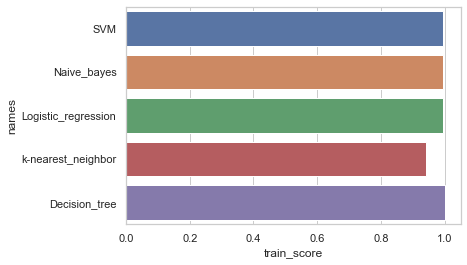

In [47]:
sns.set(style='whitegrid')
ax = sns.barplot(y='names',x='train_score',data=df)


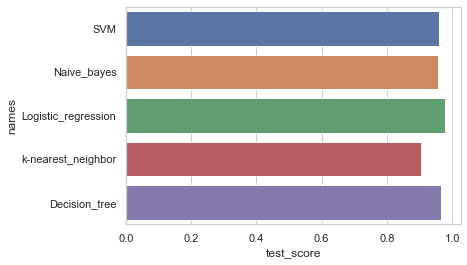

In [48]:
sns.set(style='whitegrid')
ax = sns.barplot(y='names',x='test_score',data=df)

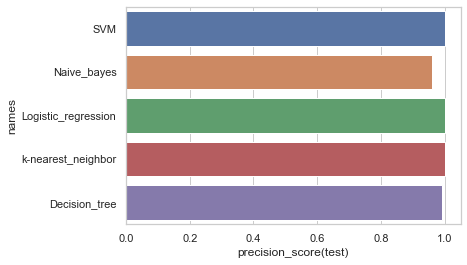

In [49]:
sns.set(style='whitegrid')
ax = sns.barplot(y='names',x='precision_score(test)',data=df)

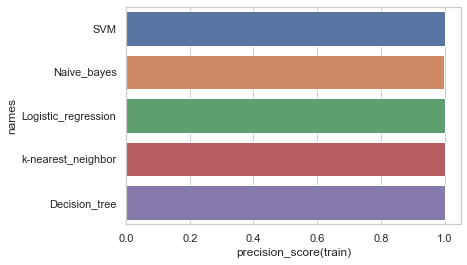

In [50]:
sns.set(style='whitegrid')
ax = sns.barplot(y='names',x='precision_score(train)',data=df)

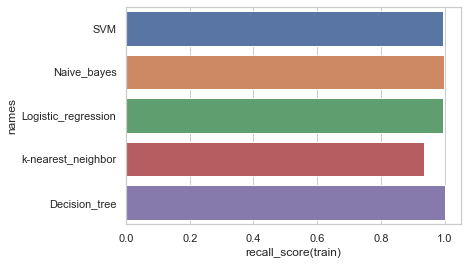

In [51]:
sns.set(style='whitegrid')
ax = sns.barplot(y='names',x='recall_score(train)',data=df)

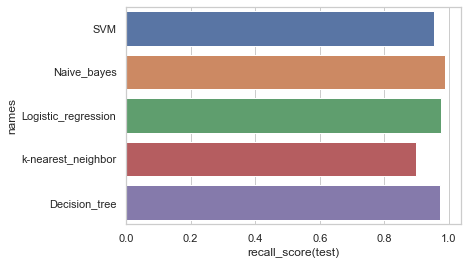

In [52]:
sns.set(style='whitegrid')
ax = sns.barplot(y='names',x='recall_score(test)',data=df)